<a href="https://colab.research.google.com/github/subhashpolisetti/Decision-Tree-Ensemble-Algorithms/blob/main/Gradient_Boosting_Decision_Trees_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression with Ensemble Learning

This notebook demonstrates implementing a decision tree from scratch for regression and applying an ensemble of decision trees to minimize residuals and improve predictions.

## Key Steps:
1. **Data Preparation**: We generate synthetic data (`x` and `y`), where `x` is the feature and `y` is the target.
2. **Decision Tree Class**: A custom `DecisionTree` class is created to implement the regression decision tree, including functionality to find the best splits.
3. **Ensemble Learning**: Multiple decision trees are trained iteratively to predict residuals, progressively improving predictions.
4. **Visualization**: The predictions and residuals are visualized after each iteration to track model performance.

This approach highlights how ensemble learning methods like boosting can be applied to regression problems to enhance accuracy.


In [1]:

%matplotlib inline

import pandas as pd
import numpy as np
from fastai.imports import *
from IPython.display import display
from sklearn import metrics

In [2]:

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

3. DecisionTree Class
This class implements a simple decision tree to split the dataset and recursively split the data to minimize variance.

In [5]:
class DecisionTree():
    def __init__(self, x, y, idxs=None, min_leaf=2):
        """
        Initializes the decision tree by setting input features, target values,
        and various internal parameters such as minimum leaf size.

        x: Feature matrix (input features)
        y: Target vector (true labels)
        idxs: Indices of data points to use for the current tree split (default: None uses all)
        min_leaf: Minimum number of samples required to form a leaf node (default: 2)
        """
        if idxs is None:
            idxs = np.arange(len(y))  # If no specific indices are given, use all data points
        self.x, self.y, self.idxs, self.min_leaf = x, y, idxs, min_leaf
        self.n, self.c = len(idxs), x.shape[1]  # n = number of samples, c = number of features
        self.val = np.mean(y[idxs])  # Store the mean of the target values in this node
        self.score = float('inf')  # Initialize the best score with infinity
        self.find_varsplit()  # Call function to find the best variable split

    def find_varsplit(self):
        """
        Find the best feature and threshold to split the data.

        Iterates over all features and calculates the best split by minimizing the
        variance (or standard deviation) in the target variable on each side of the split.
        """
        for i in range(self.c):
            self.find_better_split(i)  # Try to find a better split for each feature
        if self.score == float('inf'):
            return  # If no valid split is found, exit the method

        # After finding the best split, divide data into left and right subsets
        x = self.split_col  # Column of data selected for the split
        lhs = np.nonzero(x <= self.split)[0]  # Left-hand side (less than or equal to the split value)
        rhs = np.nonzero(x > self.split)[0]  # Right-hand side (greater than the split value)

        # Recursively create left and right branches (subtrees) using the split data
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])  # Left child tree
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])  # Right child tree

    def find_better_split(self, var_idx):
        """
        Find the best split for a particular feature (variable).

        var_idx: The index of the feature to evaluate.

        This method calculates the best split by minimizing the variance in the target variable
        on both sides of the split (left and right).
        """
        # Extract the values for the chosen feature and the corresponding target variable
        x, y = self.x.values[self.idxs, var_idx], self.y[self.idxs]

        # Sort the feature values and the target values based on the feature values
        sort_idx = np.argsort(x)  # Get indices that would sort the feature values
        sort_y, sort_x = y[sort_idx], x[sort_idx]  # Sorted target and feature values

        # Initialize variables to track the sums and counts for left and right splits
        rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()  # Right side (initially all data)
        lhs_cnt, lhs_sum, lhs_sum2 = 0, 0., 0.  # Left side (initially empty)

        # Loop over the data to test possible split points
        for i in range(0, self.n - self.min_leaf - 1):  # Ensuring that there are enough data points in both splits
            xi, yi = sort_x[i], sort_y[i]  # Current feature value and corresponding target value

            lhs_cnt += 1  # Increment count for left side
            rhs_cnt -= 1  # Decrement count for right side

            lhs_sum += yi  # Add target value to left side sum
            rhs_sum -= yi  # Subtract target value from right side sum

            lhs_sum2 += yi**2  # Add squared target value to left side sum of squares
            rhs_sum2 -= yi**2  # Subtract squared target value from right side sum of squares

            # Check if the current split results in a better score (lower variance)
            # Calculate the variance of the target variable for both splits
            lhs_var = lhs_sum2 / lhs_cnt - (lhs_sum / lhs_cnt) ** 2  # Variance for left side
            rhs_var = rhs_sum2 / rhs_cnt - (rhs_sum / rhs_cnt) ** 2  # Variance for right side
            total_var = lhs_var * lhs_cnt + rhs_var * rhs_cnt  # Weighted total variance

            # Update the best split if the current total variance is lower than the previous best
            if total_var < self.score:
                self.score = total_var  # Update the best score
                self.split = xi  # The split value for the current feature
                self.split_col = sort_x  # Store the sorted column for reference


In [6]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

In [7]:
# Generate random uniform distributions in different ranges to create target variable 'y'

y1 = np.random.uniform(10, 15, 10)  # 10 random values between 10 and 15
y2 = np.random.uniform(20, 25, 10)  # 10 random values between 20 and 25
y3 = np.random.uniform(0, 5, 10)    # 10 random values between 0 and 5
y4 = np.random.uniform(30, 32, 10)  # 10 random values between 30 and 32
y5 = np.random.uniform(13, 17, 10)  # 10 random values between 13 and 17

# Concatenate all the individual arrays to form a single target variable 'y'
y = np.concatenate((y1, y2, y3, y4, y5))  # Combine the five arrays into one

# Reshape the array to a column vector (nx1) for compatibility with model training
y = y[:, None]  # Convert 'y' to a 2D column vector (50 rows, 1 column)



In [8]:

x.shape, y.shape

((50, 1), (50, 1))

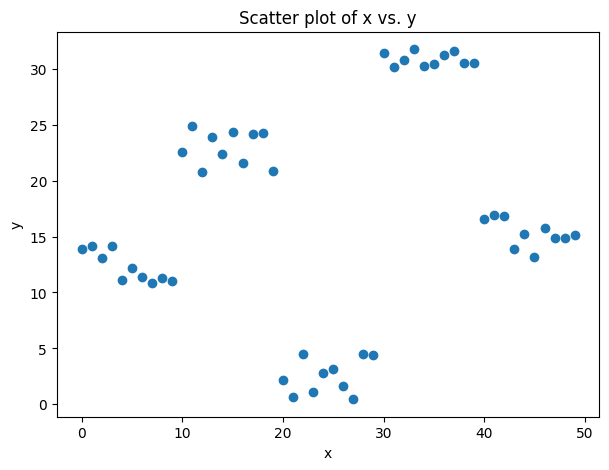

In [9]:
# Create a figure with a specified size (7 inches by 5 inches)
plt.figure(figsize=(7, 5))

# Plot the data points (x vs y) using circles ('o') to represent the points
plt.plot(x, y, 'o')

# Set the title of the plot
plt.title("Scatter plot of x vs. y")

# Label the x-axis
plt.xlabel("x")

# Label the y-axis
plt.ylabel("y")

# Display the plot
plt.show()


<ipython-input-10-da6585c53de4>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13, 2.5))


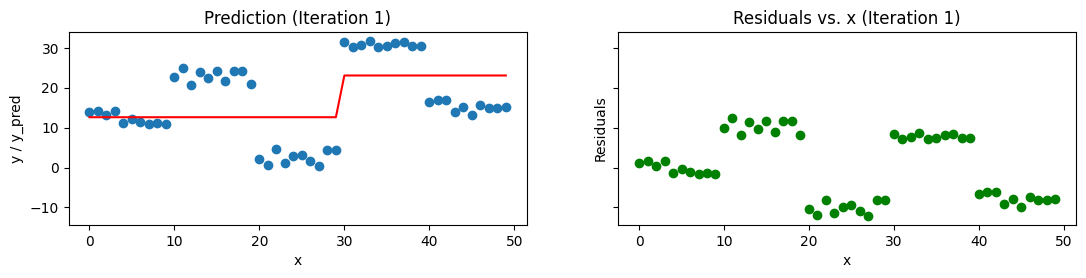

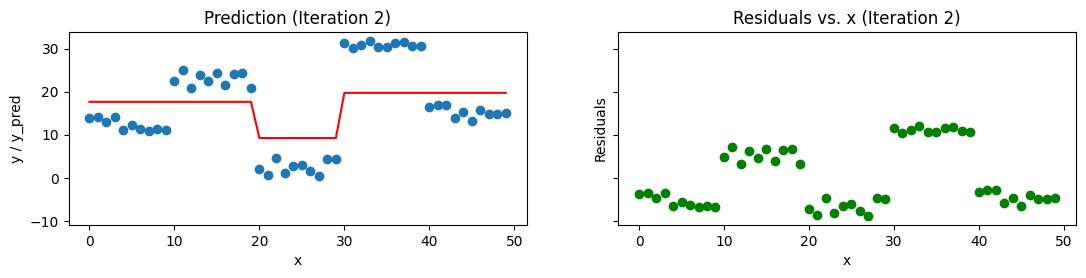

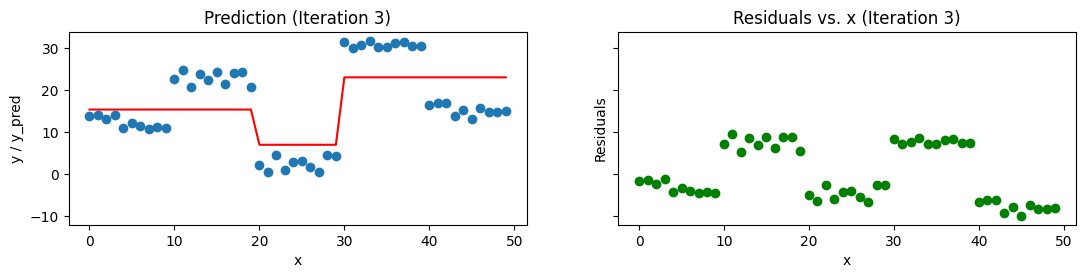

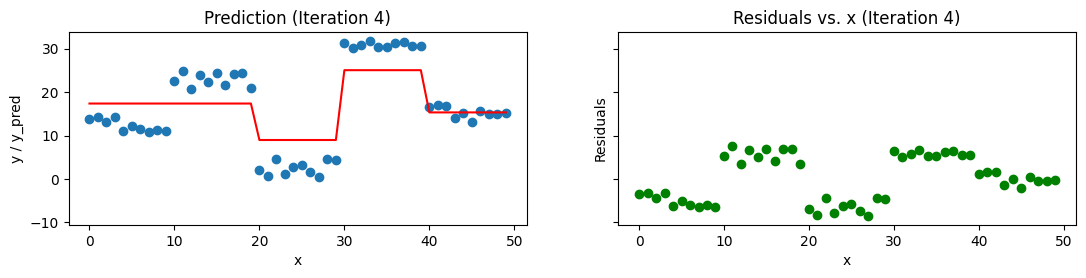

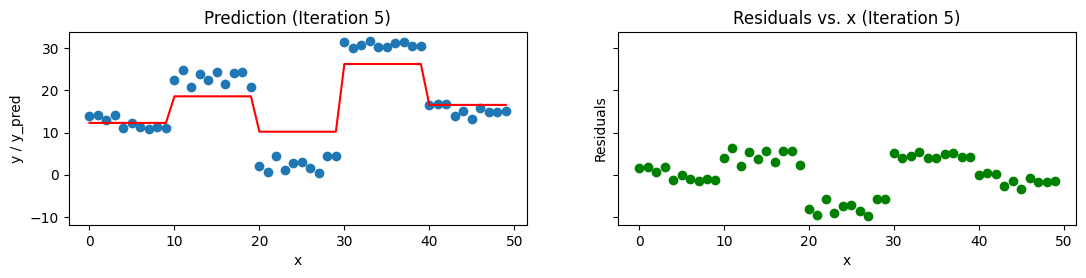

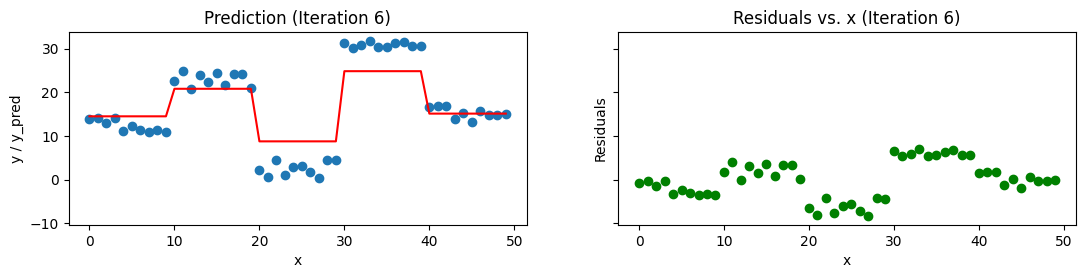

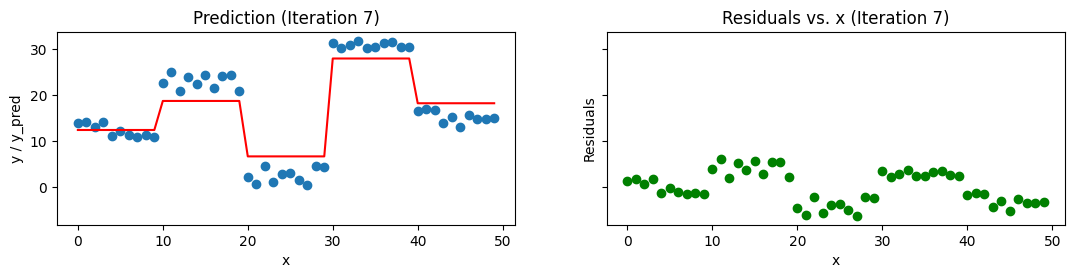

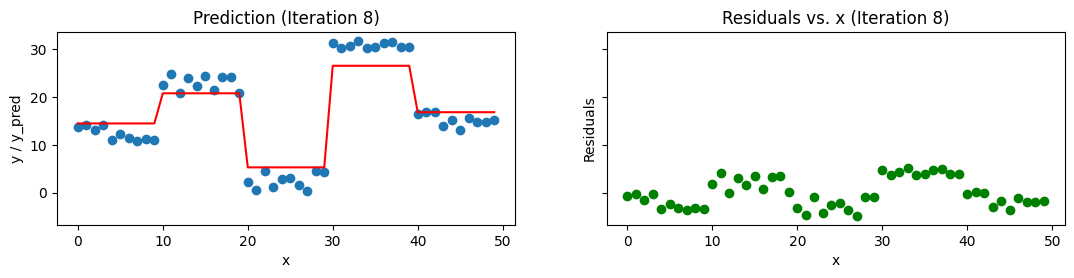

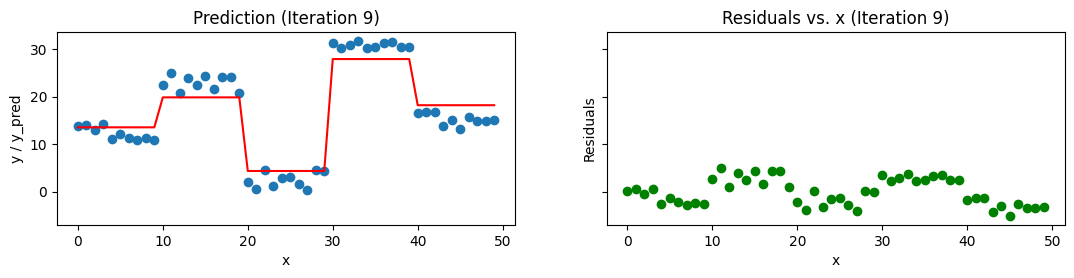

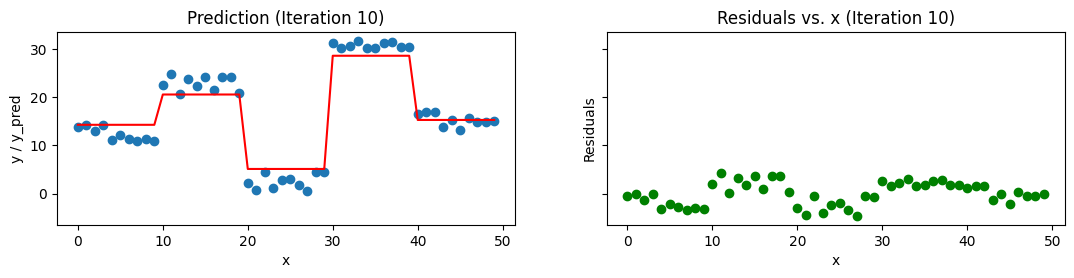

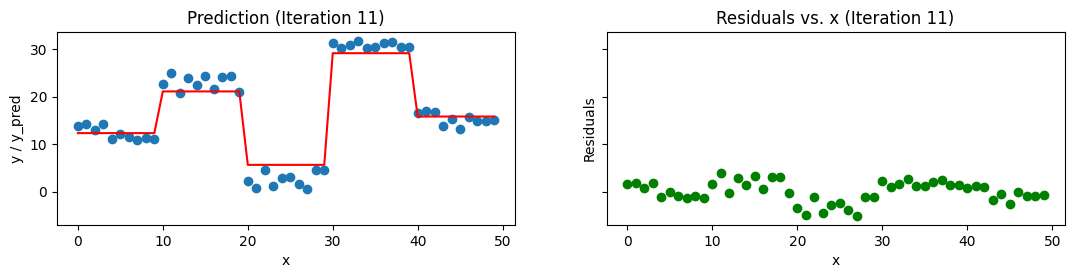

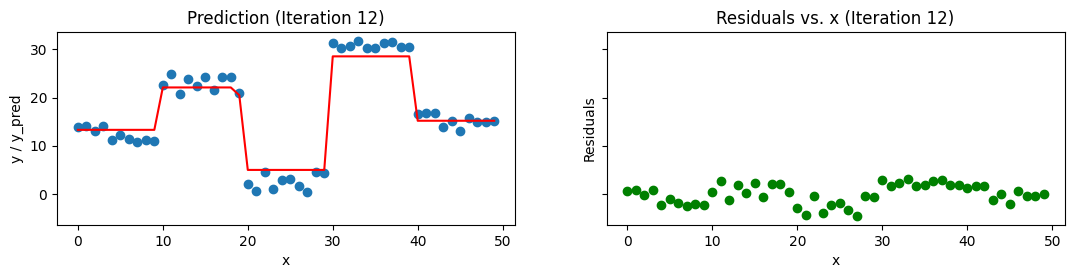

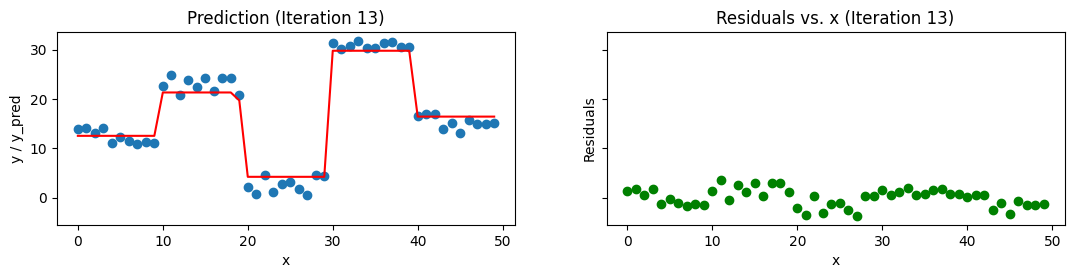

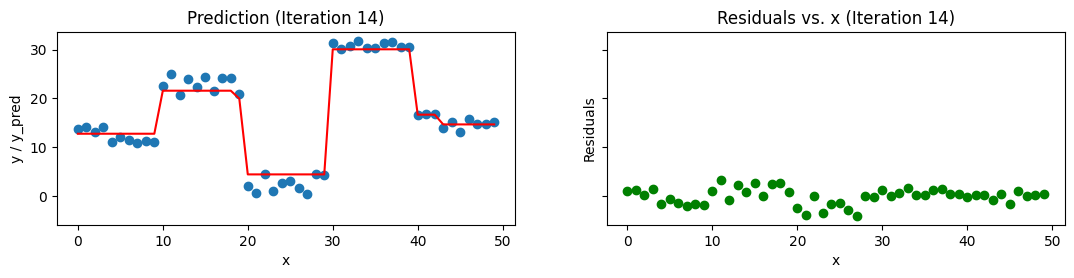

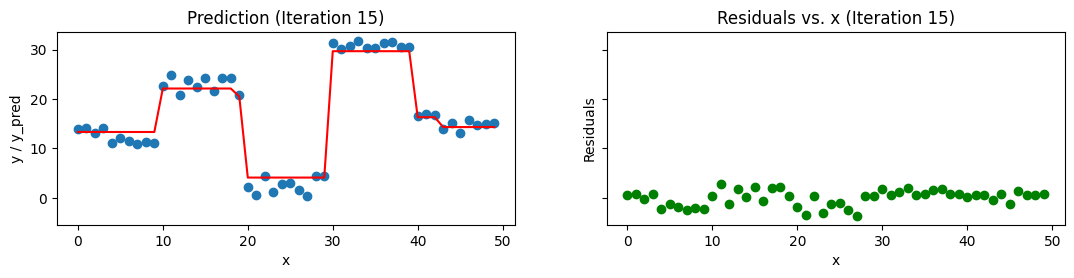

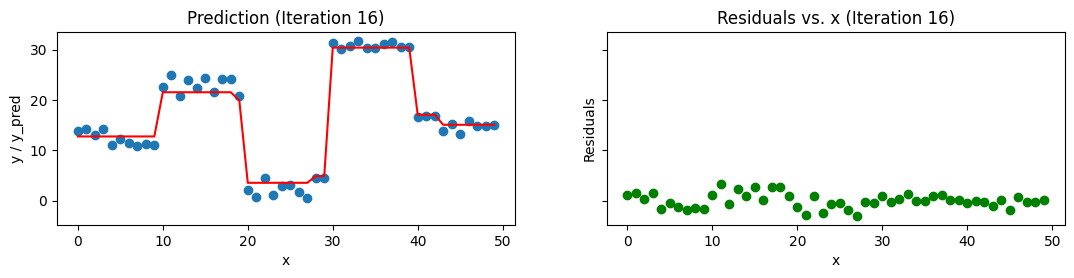

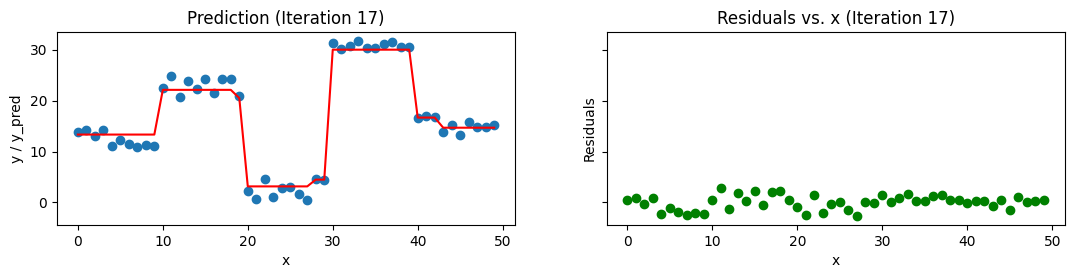

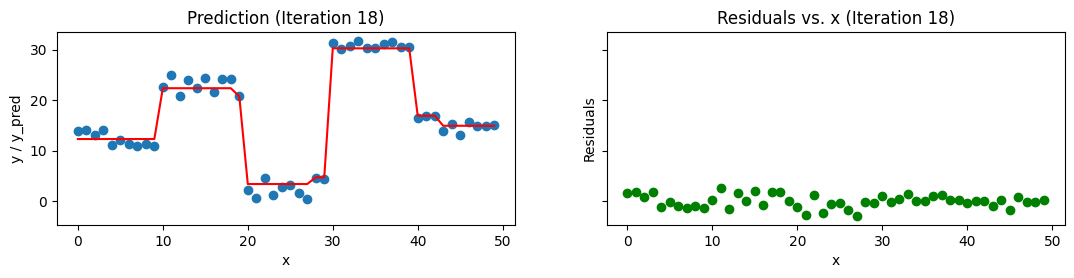

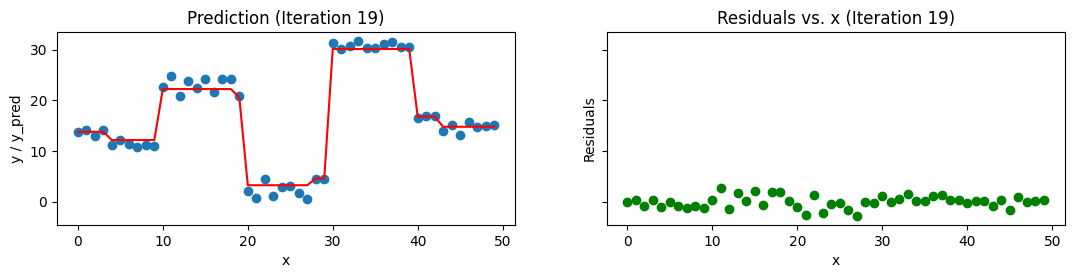

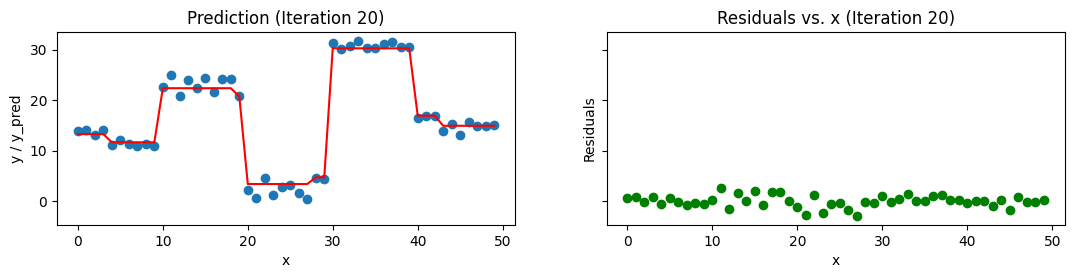

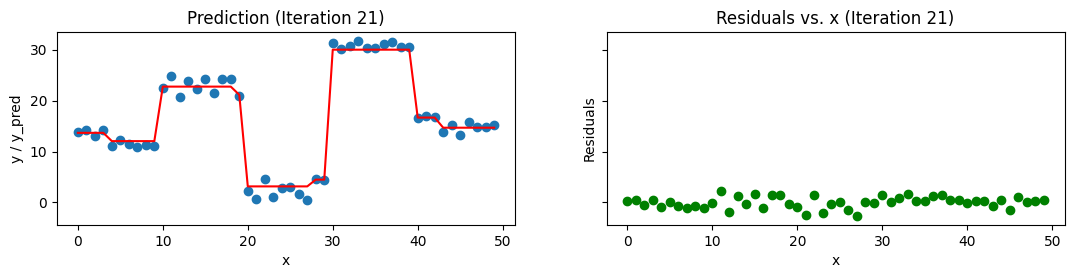

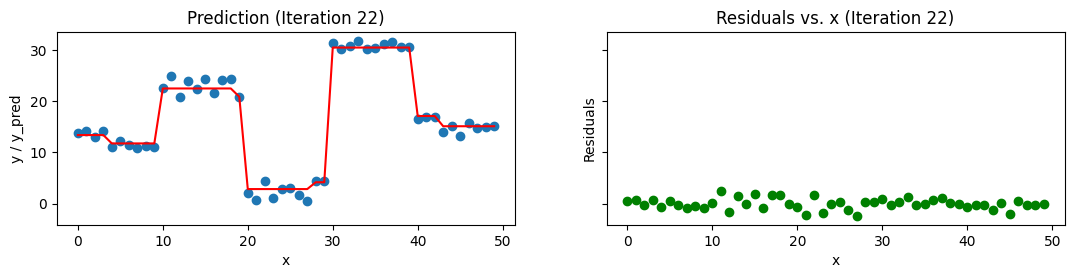

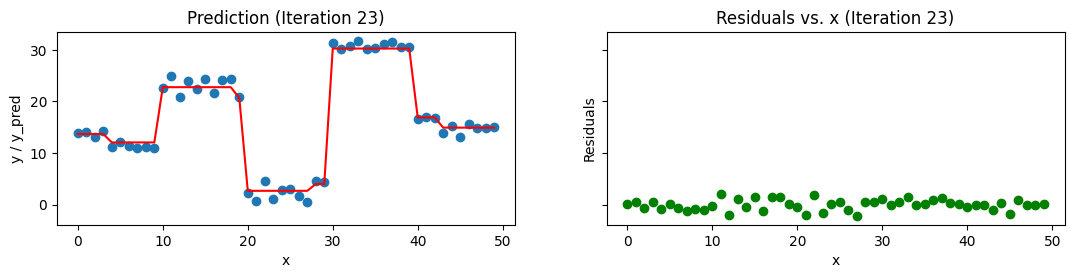

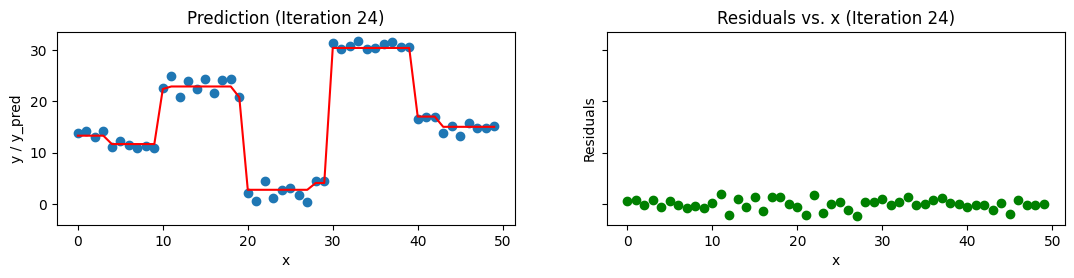

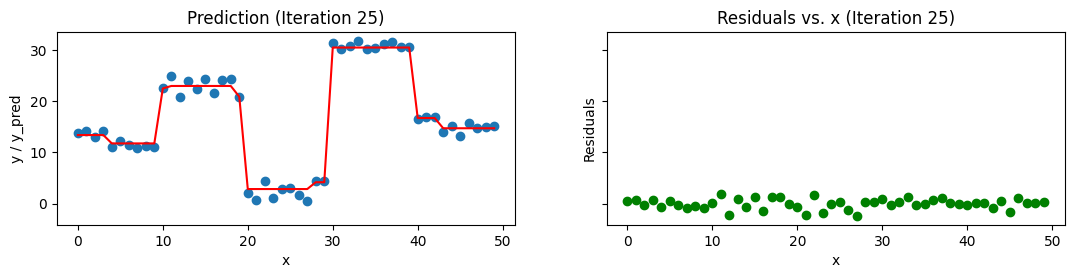

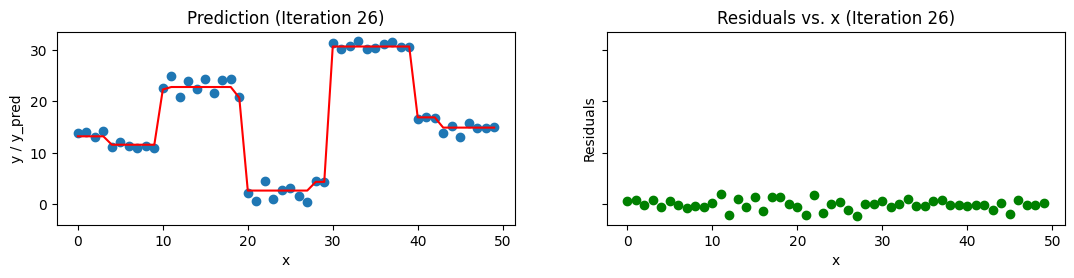

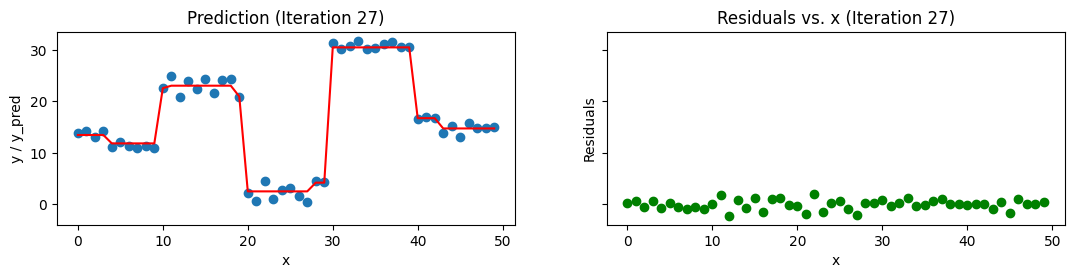

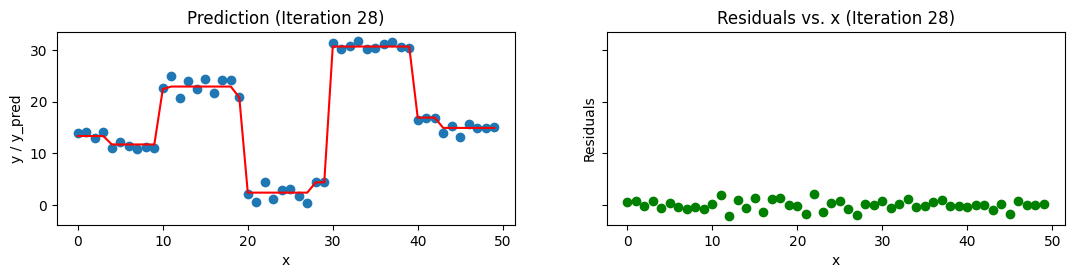

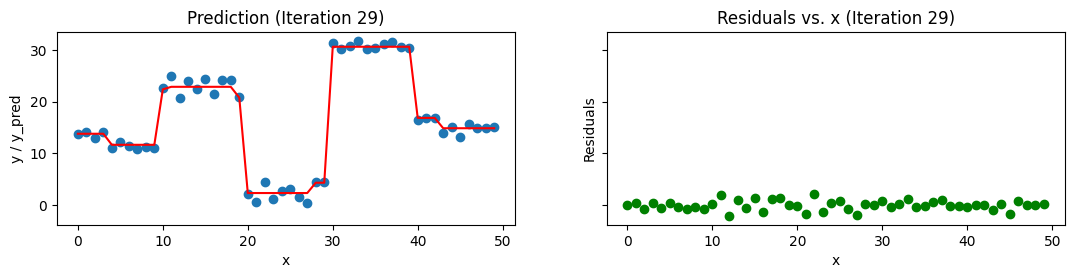

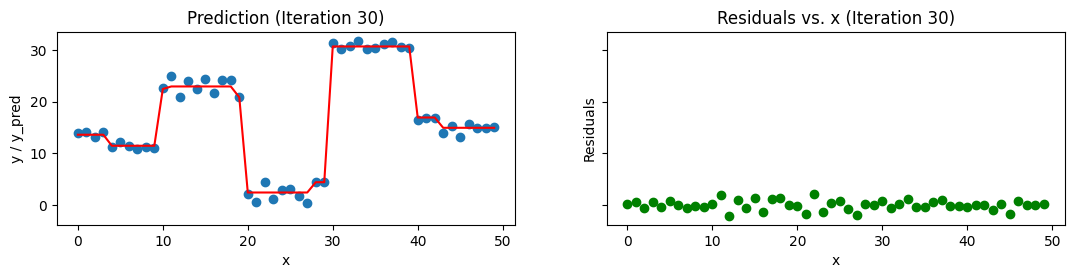

In [10]:
# Initialize input (xi) and target (yi) variables. These will be used for the gradient boosting process.
xi = x  # Input features (x values)
yi = y  # Target variable (y values)

# Initialize error (ei) and prediction (predf) variables for the boosting loop
ei = 0  # Error initialized to 0
n = len(yi)  # Number of data points (rows)
predf = 0  # Initial prediction set to 0

# Loop to create 30 decision trees (n_estimators)
for i in range(30):  # n_estimators = 30
    tree = DecisionTree(xi, yi)  # Create a decision tree instance with the current input and target data
    tree.find_better_split(0)  # Find the best split for the input variable (feature 0) to minimize target variance

    # Find the index where the best split occurs in the input data
    r = np.where(xi == tree.split)[0][0]  # Index of the split

    # Find the indices for the left-hand side (lhs) and right-hand side (rhs) based on the split value
    left_idx = np.where(xi <= tree.split)[0]  # Indices of data points for the left split
    right_idx = np.where(xi > tree.split)[0]  # Indices of data points for the right split

    # Initialize an array for predictions
    predi = np.zeros(n)  # Initialize the prediction array with zeros

    # Replace the left side values with the mean of the target values for the left split
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))
    # Replace the right side values with the mean of the target values for the right split
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))

    predi = predi[:, None]  # Reshape the prediction array to a column vector (nx1) to match the shape of y
    predf = predf + predi  # Update the cumulative prediction by adding the residual predictions of this tree

    # Calculate residuals (difference between original target and predicted values)
    ei = y - predf  # Residuals are the difference between the true target values and the predictions
    yi = ei  # Update the target variable for the next tree to predict the residuals

    # Plotting after the prediction
    xa = np.array(x.x)  # Get the x values (features)
    order = np.argsort(xa)  # Sort the x values for plotting
    xs = np.array(xa)[order]  # Sorted x values
    ys = np.array(predf)[order]  # Sorted predicted values

    # Create subplots for prediction vs x and residuals vs x
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13, 2.5))

    # Plot prediction vs x (actual vs predicted values)
    ax1.plot(x, y, 'o')  # Plot actual y values as circles
    ax1.plot(xs, ys, 'r')  # Plot predicted y values as red line
    ax1.set_title(f'Prediction (Iteration {i+1})')  # Set title for the plot
    ax1.set_xlabel('x')  # Label for the x-axis
    ax1.set_ylabel('y / y_pred')  # Label for the y-axis

    # Plot residuals vs x
    ax2.plot(x, ei, 'go')  # Plot residuals as green circles
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')  # Set title for the plot
    ax2.set_xlabel('x')  # Label for the x-axis
    ax2.set_ylabel('Residuals')  # Label for the y-axis
